### Project Name:
# Mercedes-Benz Greener Manufacturing


#### Project by: Syed Sabeel
#### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

### 1. Business Problem:

Cars from any manufacturing brand has to go through the testing phase before it hits on the road. Any new technology introduced, people are more concerned about the mechanism and safety of the car. Manufacturing brand has to ensure all the features in the cars are tested well to meet the customers need.

Of all the car manufacturing brand, Mercedes-Benz brand car stands out when it comes to features and safety. People liking towards the luxurious brand Mercedes is increasing and same Mercedes is also maintaining its standard by meeting the expectation of the customers.

Every car manufactured needs to be tested robustly and passed before reaching to the customer. Features like SRS/Airbag, lane assist, blindspot, sensors, cruise control etc which are more related to safety of the car needs to be tested precisely. With new features, more and more testing leads to increase in testing time. Testing time is the time taken by the testing team to test the car completely after receiving from the manufacturing till the completion of the test. Increase in the testing time will slower the number of cars reaching the market and this tends to decrease the business of the Mercedes-Benz.In addition, more testing requires more workers and more carbon monoxide released will make Mercedes-Benz to spend more during this phase.On the other hand, testing the car being critical for safety and needs to be passed before delivering. To cope with the demands and proper testing within the time is highly required. This can be achieved by building algorithm model to reduce the time taken for testing and optimizing the data

Testing data collected from Mercedes-Benz to be considered to build the model with testing time being labeled as the outcome. By identifying the features more relevant and essential for testing, regression model to be build for the continous time problem thus predicting the testing time required 
for complete task to the given test data.


### 2. Import the necessary libraries:


In [1]:
import pandas as pd # pandas is a python package to manipulate data, data operation, data handling, data wrangling
import numpy as np # numpy is a math library to perform numerical operation using pre-defined function
import matplotlib.pyplot as plt #matplotlib is a library for graphic or data visualization
import seaborn as sns #Seaborn is a library for making statistical graphics in Python
import warnings # to hide the warning message if any
warnings.filterwarnings('ignore')

In [2]:
# Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms
#eXtreme Gradient Boosting is a library for developing fast and high-performance gradient boosting tree models
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [3]:
# Version record used to generate model
import sklearn
print("sklearn version:",sklearn.__version__)
print("Numpy Version:", np.__version__)

sklearn version: 0.24.2
Numpy Version: 1.18.2


### 3. Load the dataset and identify the dependent and independent variables

Mercedes_benz has provided 2 database- train & test database in csv format. Train database includes testing time(4209 rows,378 columns) and test database excludes testing time(4209 rows,377 columns) which has to be predicted using Machine learning algorithm.

After data analysis, there are many features and following type of variable found below-

a. Dependent Variable- column 'y'(Testing time) in float64 dtype and this is dependent on all the other features

b. Independent Variable- there are 369 numerical features and 8 categorical features.
By analysis, testing time to be predicted and is continuous flow. Change in independent variable will tend to have affect on 'y' testing time.
Since 'y' is continuous and this cannot be classified. Hence, we need to consider regression models to build ML alogirthm model.

However, for testing database there are only independent variables and missing column 'y' to be predicted using the regression model.

In [4]:
df_train = pd.read_csv('train.csv') # Training dataset with testing time
df_test = pd.read_csv('test.csv')   # Testing dataset without testing time

In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


### 4. EDA(Exploratory Data Analysis)

In [7]:
# Check rows and columns in dataset
print('df_train dataset rows,columns:',df_train.shape)
print('df_test dataset rows,columns:', df_test.shape)

df_train dataset rows,columns: (4209, 378)
df_test dataset rows,columns: (4209, 377)


In [8]:
# def function to find null values in database
def check_null(df):
    if df.isna().any().any():
        print("Null Values in dataframe")
    else:
        print("No Null Values in dataframe")

In [9]:
check_null(df_train)
check_null(df_test)

No Null Values in dataframe
No Null Values in dataframe


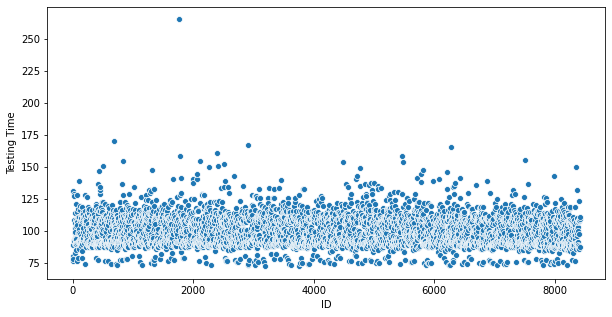

In [10]:
#Figure-1: Scatter plot graph to visualize the scattering of testing time 'y' datapoints.  
plt.figure(figsize=(10,5))
sns.scatterplot(df_train['ID'],df_train['y'])
plt.ylabel('Testing Time')
plt.xlabel('ID')
plt.savefig('Figure_1_Scatterplot.png')

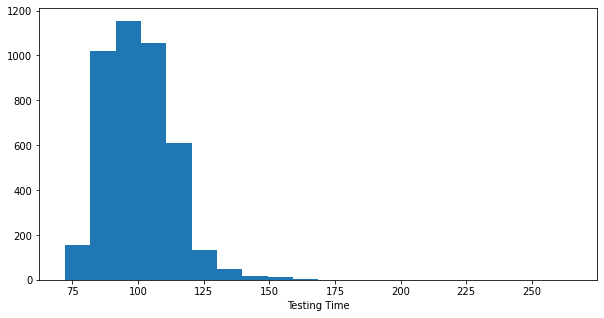

In [11]:
#Figure-2: Histogram with bins to find the frequency of testing time
plt.figure(figsize=(10,5))
plt.hist(df_train['y'], bins=20)
plt.xlabel("Testing Time")
plt.savefig('Figure_2_Hist_Time.png')
plt.show()

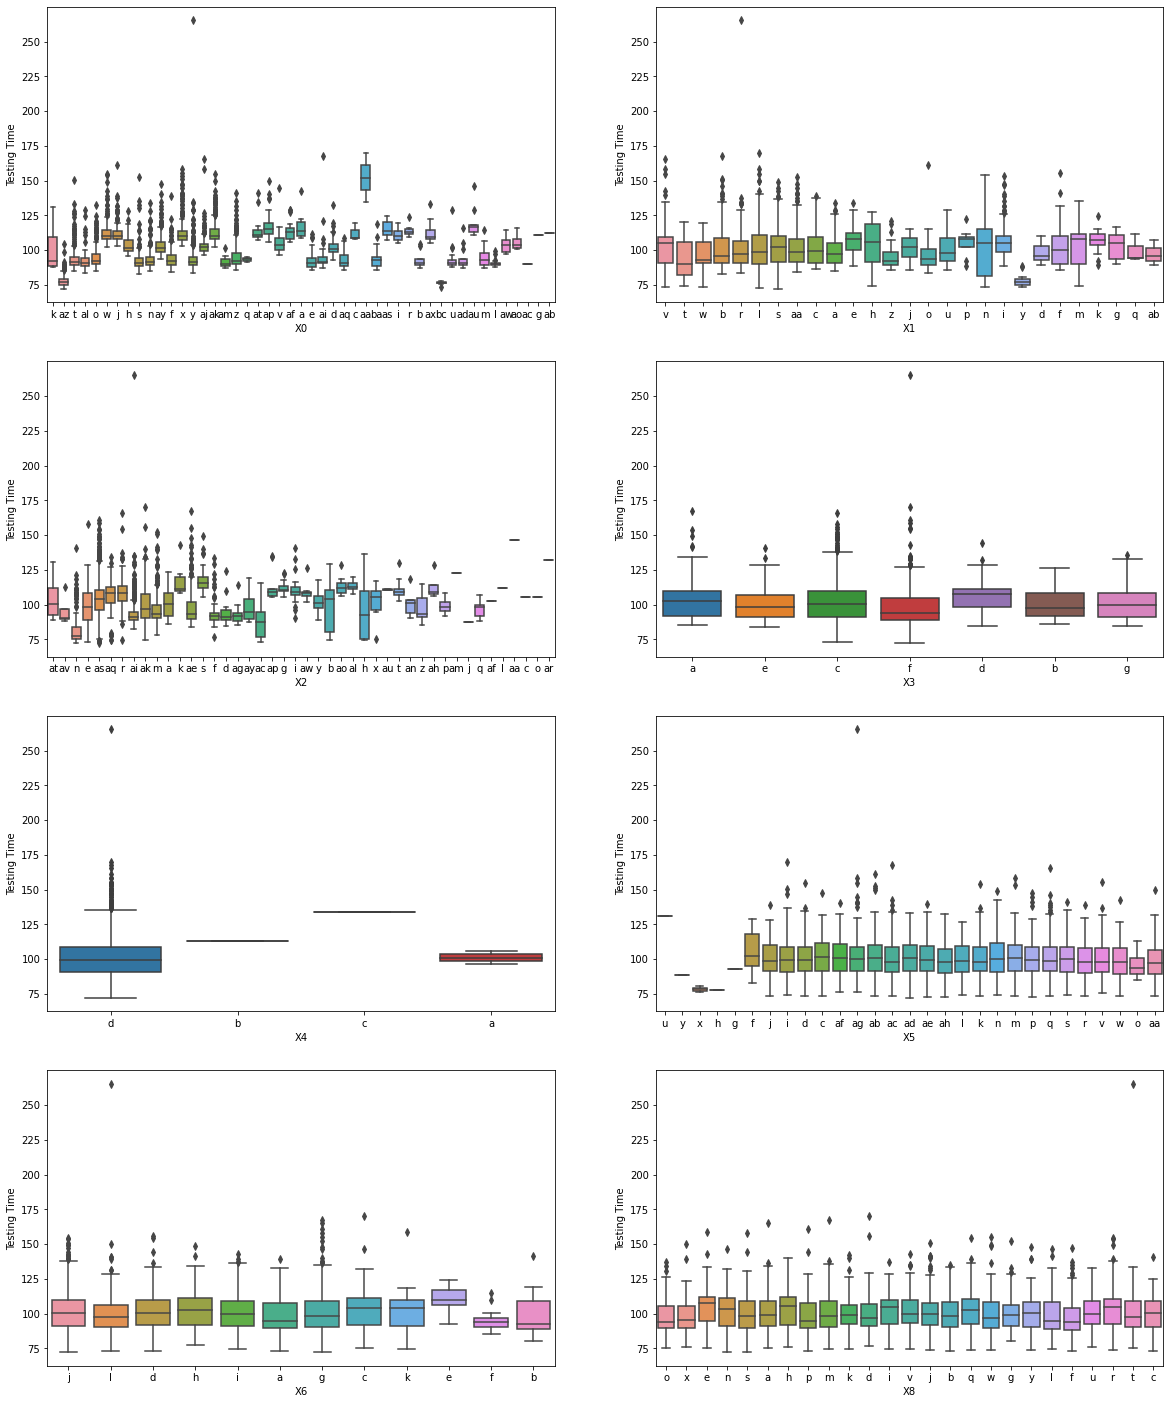

In [12]:
#Figure-3 : Boxplot for Categorical data to check the distribution.
plt.figure(figsize=(20,25))
for i in range(2,10):
    axi=plt.subplot(4,2,i-1)
    sns.boxplot(df_train[df_train.columns[i]],df_train['y'],ax=axi)
    plt.ylabel('Testing Time')
plt.savefig('Figure_3_Boxplot_Cat.png')

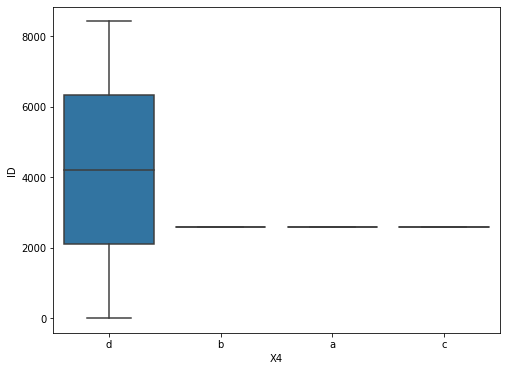

In [13]:
#Figure-4 : Boxplot for variable X4 of test database
plt.figure(figsize=(8,6))
sns.boxplot(df_test[df_test.columns[5]],df_test['ID'])
plt.savefig('Figure_4_Box_Cat_test.png')

#### 4.1 Outliers-

Any outliers in the data shall be removed to avoid any miscalculation in the model prediction. 
In this project, testing time y is given as the only floating number.So we need to find the outlier and remove the complete row if any.

Using Seaborn data visualization library's boxplot from matplotlib we are going to find the outliers and these found outliers will be filtered out from the train dataset.

From Figure-5 Outlier we can observe the distribution of testing time and outliers.From descirbe function we can get mean around 100. However, there is big difference in testing time from 75th percentile to 100th(max) percentile and anything beyond 155 i.e 99.8percentile can be considered as outlier and can be dropped from dataset.

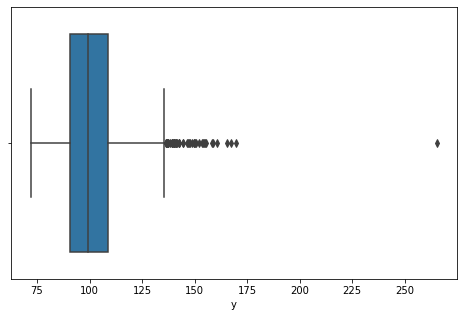

In [14]:
#Figure-5: Boxplot for finding Outliers 
plt.figure(figsize=(8,5))
sns.boxplot(df_train['y'])
plt.savefig('Figure_5_Boxplot_Outlier.png')

In [15]:
df_train['y'].describe(percentiles=[0.998]).T

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
50%        99.150000
99.8%     154.686960
max       265.320000
Name: y, dtype: float64

In [16]:
df_train[df_train['y']>155]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
342,681,169.91,aa,l,ak,f,d,i,c,d,...,0,0,0,0,0,0,0,0,0,0
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0
889,1784,158.53,aj,l,as,f,d,ag,k,e,...,0,0,0,0,0,0,0,0,0,0
1203,2396,160.87,j,o,as,f,d,ab,g,p,...,1,0,0,0,0,0,0,0,0,0
1459,2903,167.45,ai,b,ae,a,d,ac,g,m,...,0,0,1,0,0,0,0,0,0,0
2735,5471,158.23,x,v,e,c,d,m,g,s,...,0,0,0,0,1,0,0,0,0,0
3133,6273,165.52,aj,v,r,c,d,q,g,a,...,0,0,1,0,0,0,0,0,0,0
3744,7500,155.62,x,f,ak,c,d,v,d,d,...,1,0,0,0,0,0,0,0,0,0


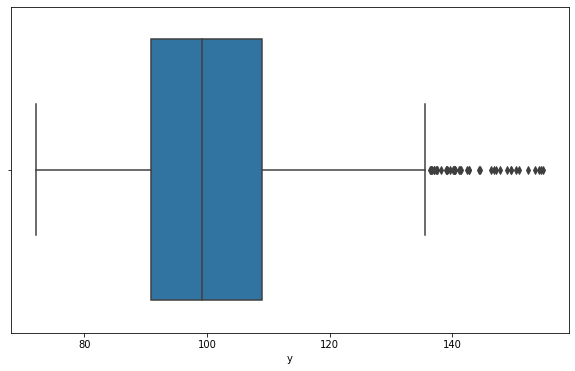

In [17]:
#Figure-6: Boxplot after Filtering Outlier
plt.figure(figsize=(10,6))
filter=df_train['y']<155
df_train=df_train[filter]
sns.boxplot(df_train['y'])
plt.savefig('Figure_6_Filtered_Outlier.png')

In [18]:
#Removing Outliers from train dataset
filter=df_train['y']<155
df_train=df_train[filter]

In [19]:
# 8 rows of data is removed from train database
df_train.shape

(4201, 378)

#### 4.2 Feature Analysis-
1. Binary/Numerical Features - included numerical type variables for both train & test data
2. Categorical Features- includes object type variables for both train & test data

In [20]:
#Binary feature variable to extract all numerical and to remove categorical variable from test and also label from train dataset.
bin_feature_train = df_train.drop(df_train.iloc[:,[1,2,3,4,5,6,7,8,9]],axis=1)
bin_feature_test = df_test.drop(df_test.iloc[:,[1,2,3,4,5,6,7,8]],axis=1)

In [21]:
#Categorical feature variable to extract all categorical from test and train dataset.
cat_feature_train=df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
cat_feature_test=df_test.iloc[:,[0,1,2,3,4,5,6,7,8]]

In [22]:
bin_feature_train.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
bin_feature_test.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
cat_feature_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,k,v,at,a,d,u,j,o
1,6,88.53,k,t,av,e,d,y,l,o
2,7,76.26,az,w,n,c,d,x,j,x
3,9,80.62,az,t,n,f,d,x,l,e
4,13,78.02,az,v,n,f,d,h,d,n


In [25]:
cat_feature_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8
0,1,az,v,n,f,d,t,a,w
1,2,t,b,ai,a,d,b,g,y
2,3,az,v,as,f,d,a,j,j
3,4,az,l,n,f,d,z,l,n
4,5,w,s,as,c,d,y,i,m


#### 4.2.1 Removal of features with zero variance from the dataset
Using Sklearn library's Variance threshold function zero variance columns in the dataset can be found by setting threshold value to zero.
Zero variance will not make any impact on the testing time, features found with zero variance can be dropped from the dataset.
There are total 13 features with zero variance ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'] and to be removed from both dataset.

In [26]:
zero_var=VarianceThreshold(threshold=0.0)
zero_var.fit(bin_feature_train)
zero_var_test=zero_var.transform(bin_feature_test)

In [27]:
Zero_var_column_train=[column for column in bin_feature_train.columns 
              if column not in bin_feature_train.columns[zero_var.get_support()]]

In [28]:
Zero_var_column_test=[column for column in bin_feature_test.columns 
              if column not in bin_feature_test.columns[zero_var.get_support()]]

In [29]:
print(Zero_var_column_train)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


In [30]:
print(Zero_var_column_test)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


#### 4.2.2 Removal of features with same & less variance from the dataset
Same Variance Features does not have affect on dependent variable and can be removed from the dataset.

Following 53 features with same variance shall be removed from both datasets:

['X35', 'X37', 'X39', 'X57', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']

Also Categorical feature with less variance which does not have any affect on dependent variable can also be removed. From Figure-4 boxplot we found 'X4' feature has less variance and this shall be removed.

In [31]:
bin_dup_var_tr=pd.DataFrame(bin_feature_train[bin_feature_train.columns[1:]].var(),columns=['Variance']).reset_index()
bin_dup_var_tr.rename(columns={'index':'Features'},inplace=True)
bin_dup_var_tr.head()

,Features,Variance
0,X10,0.013156
1,X11,0.000000
2,X12,0.068971
3,X13,0.054510
4,X14,0.244908


In [32]:
bin_dup_var_test=pd.DataFrame(bin_feature_test[bin_feature_test.columns[1:]].var(),columns=['Variance']).reset_index()
bin_dup_var_test.rename(columns={'index':'Features'},inplace=True)
bin_dup_var_test.head()

,Features,Variance
0,X10,0.018650
1,X11,0.000238
2,X12,0.068851
3,X13,0.057345
4,X14,0.244859


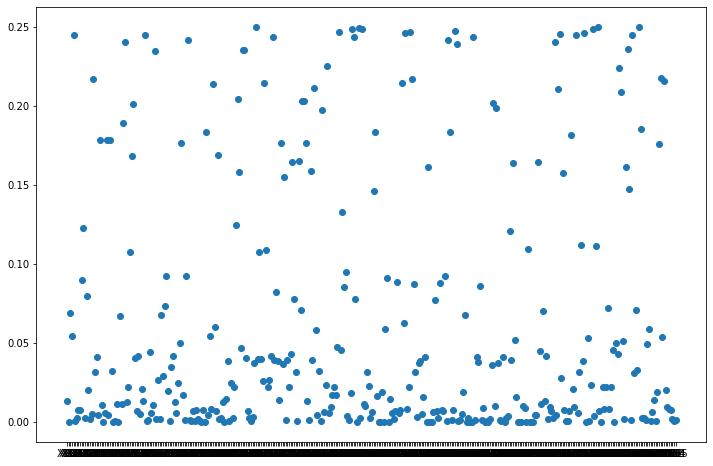

In [33]:
#Figure-7: Variance distribution for binary features using scatter plot
plt.figure(figsize=(12,8))
plt.scatter(bin_dup_var_tr['Features'],bin_dup_var_tr['Variance'],cmap='viridis')
plt.savefig('Figure_7_Variance_distribution.png')
plt.show()

In [34]:
dup_var_train=[]
for i in range(len(bin_dup_var_tr)):
    if bin_dup_var_tr.loc[i]['Features'] not in Zero_var_column_train:
        if bin_dup_var_tr['Variance'].duplicated().values[i]:
            dup_var_train.append(bin_dup_var_tr.loc[i]['Features'])

In [35]:
print(dup_var_train)

['X35', 'X37', 'X39', 'X57', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']


In [36]:
# Removal of less variance of categorical feature'X4' which is less important found from Boxplot from dataset.
df_train.drop(['X4'],axis=1,inplace=True)
bin_feature_train.drop(Zero_var_column_train,axis=1,inplace=True)
bin_feature_train.drop(dup_var_train,axis=1,inplace=True)
cat_feature_train.drop(['X4'],axis=1,inplace=True)

In [37]:
# Removal of less variance of categorical feature'X4' found from Boxplot from dataset.
df_test.drop(['X4'],axis=1,inplace=True)
bin_feature_test.drop(Zero_var_column_test,axis=1,inplace=True)
bin_feature_test.drop(dup_var_train,axis=1,inplace=True)
cat_feature_test.drop(['X4'],axis=1,inplace=True)

In [38]:
df_train.drop(Zero_var_column_train,axis=1,inplace=True)
df_train.drop(dup_var_train,axis=1,inplace=True)

In [39]:
df_test.drop(Zero_var_column_test,axis=1,inplace=True)
df_test.drop(dup_var_train,axis=1,inplace=True)

In [40]:
bin_feature_test.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
cat_feature_test.head()

,ID,X0,X1,X2,X3,X5,X6,X8
0,1,az,v,n,f,t,a,w
1,2,t,b,ai,a,b,g,y
2,3,az,v,as,f,a,j,j
3,4,az,l,n,f,z,l,n
4,5,w,s,as,c,y,i,m


In [42]:
train_ID = cat_feature_train['ID']
cat_train_y = cat_feature_train['y']
test_ID = cat_feature_test['ID']

### 5. Feature Engineering

#### 5.1 Encoding

In the dataset provided we have 8 categorical features that are of object type. To proceed with Machine Learning model implementation all the variables values should be of numerical type.Encoding of Categorical to numerical can be done using scikit learn library's Label Encoder function which assigns specific number to value in variable.

Fit in the label Encoder function in train dataset shall assign numerical class to each category and same can be transformed to test database shown in below code.


In [43]:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder function from sklearn
le=LabelEncoder() # Assigning label encoder to an object 

In [44]:
#By passing label encoder to all categorical type in df_train and cat_feature train dataframe, this can be converted to numerical value.
for col in cat_feature_train.columns[2:9]:
    le.fit(list(cat_feature_train[col].values))
    df_train[col]=le.transform(list(df_train[col].values))
    cat_feature_train[col]=le.transform(list(cat_feature_train[col].values))

In [45]:
#By passing label encoder to all categorical type in df_test and cat_feature test dataframe, this can be converted to numerical value.
for col in cat_feature_test.columns[1:8]:
    le.fit(list(cat_feature_test[col].values))
    df_test[col]=le.transform(list(df_test[col].values))
    cat_feature_test[col]=le.transform(list(cat_feature_test[col].values))

In [46]:
cat_feature_test.head()

,ID,X0,X1,X2,X3,X5,X6,X8
0,1,21,23,34,5,26,0,22
1,2,42,3,8,0,9,6,24
2,3,21,23,17,5,0,9,9
3,4,21,13,34,5,31,11,13
4,5,45,20,17,2,30,8,12


In [47]:
cat_feature_train.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8
0,0,130.81,32,23,17,0,24,9,14
1,6,88.53,32,21,19,4,28,11,14
2,7,76.26,20,24,34,2,27,9,23
3,9,80.62,20,21,34,5,27,11,4
4,13,78.02,20,23,34,5,12,3,13


In [48]:
bin_feature_train.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,6,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_train.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,32,23,17,0,24,9,14,0,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,32,21,19,4,28,11,14,0,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,27,9,23,0,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,20,21,34,5,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


#### 5.2 Feature Importance

From Figure-3 Boxplot, important feature that tend to increase or decrease the testing time can be seen.This is obtained by running RandomForest algorithm and fetching the important feature from feature_importance_ parameter in accordance with variance.
Features 'X118','X314' & X315' have high variance and having this feature will directly increase the testing time.Hence, this can be considered important feature & can be combined.Whereas, having features 'X29','X54' & 'X127' will decrease the testing time as this is inversely proportional to the testing time.

Below code upto interaction function is only for feature importance

In [50]:
Xb=bin_feature_train.drop('ID',axis=1)
yb=df_train['y']
Xb.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
Xb_train,xb_test,yb_train,yb_test=train_test_split(Xb,yb,test_size=0.3,random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf_inter=RandomForestRegressor()
rf_inter.fit(Xb_train,yb_train)

RandomForestRegressor()

In [53]:
a=list(Xb_train.columns)
b=list(rf_inter.feature_importances_)
d={'Feature':a,'Importance':b}
df_feature=pd.DataFrame(d)

In [54]:
df_feature.describe().T

,count,mean,std,min,25%,50%,75%,max
Importance,302.0,0.003311,0.026581,0.0,0.000039,0.000483,0.001924,0.450736


In [55]:
df_feature=df_feature[df_feature['Importance']>0.007]
df_feature

,Feature,Importance
17,X29,0.019849
31,X46,0.007181
36,X51,0.007084
39,X54,0.027485
94,X118,0.069709
99,X127,0.010532
152,X189,0.027870
242,X314,0.450736
243,X315,0.070423


In [56]:
c=df_feature['Feature'].values
y_feature=[]
for i in range(len(df_train.columns)):
    if df_train.columns[i] in c:
        y_feature.append(df_train['y'][i])
y_feature=np.array(y_feature)
y_feature

array([104.07, 101.44, 110.52,  91.59,  92.35, 107.83, 105.77,  91.01,
       122.24])

In [57]:
df_feature.insert(2,"y",y_feature)

In [58]:
df_feature

,Feature,Importance,y
17,X29,0.019849,104.07
31,X46,0.007181,101.44
36,X51,0.007084,110.52
39,X54,0.027485,91.59
94,X118,0.069709,92.35
99,X127,0.010532,107.83
152,X189,0.027870,105.77
242,X314,0.450736,91.01
243,X315,0.070423,122.24


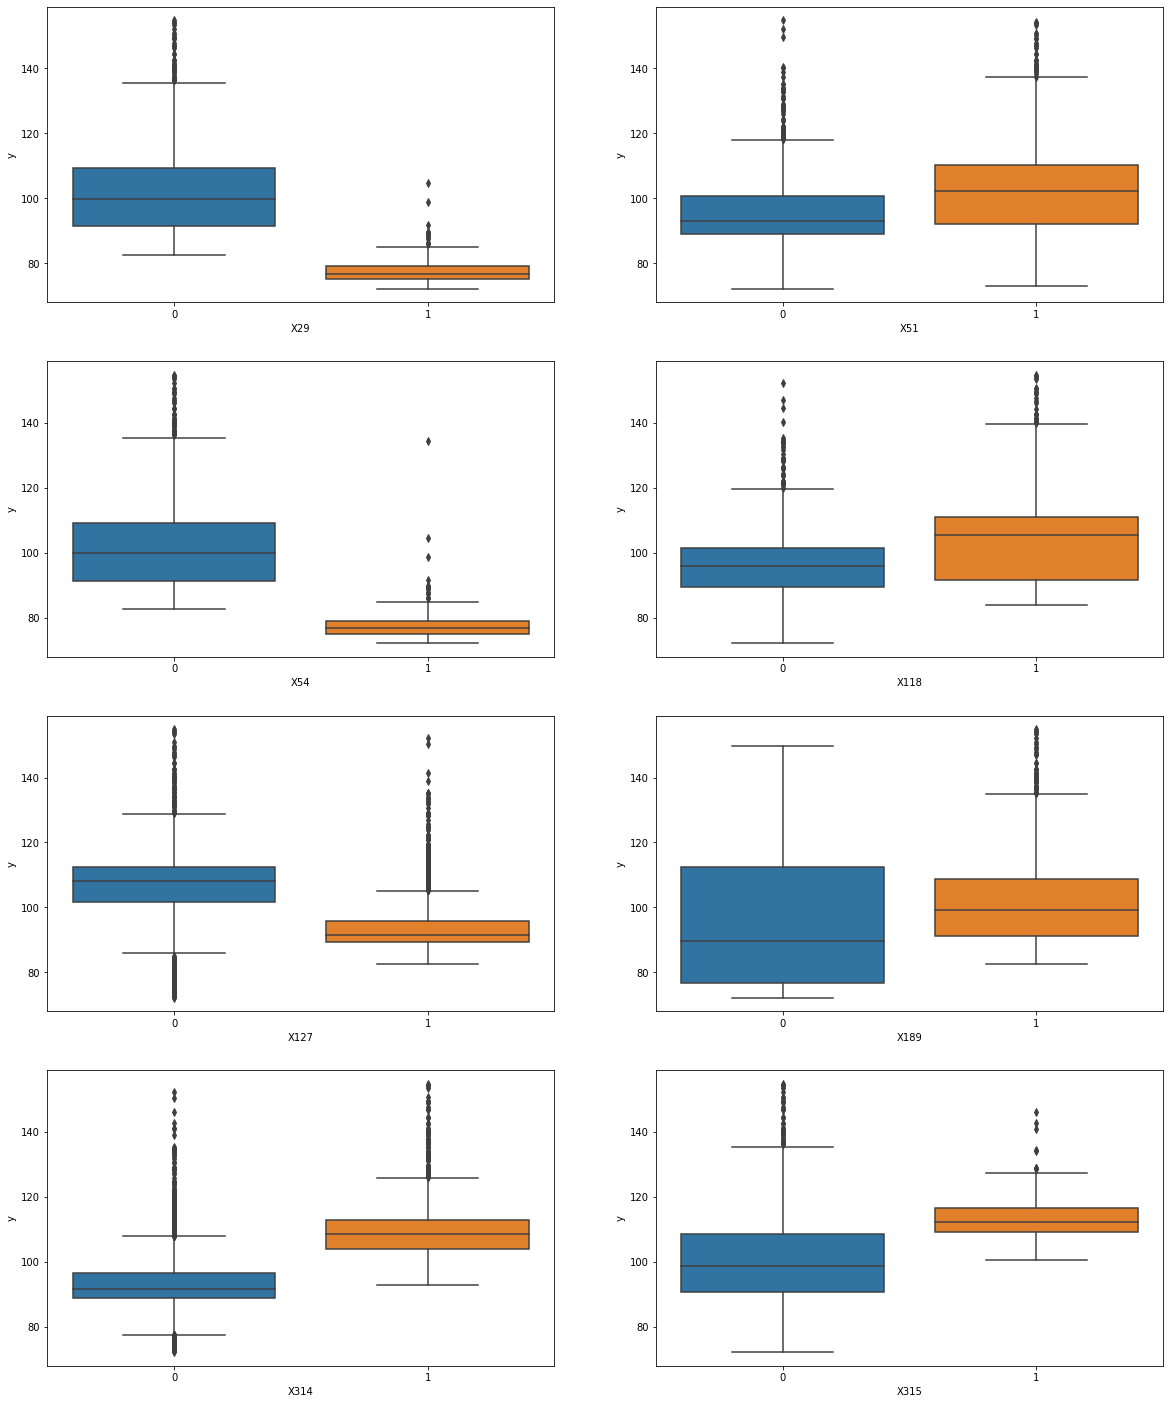

In [59]:
#Figure-8: Feature Importance from RandomForestRegressor model.
plt.figure(figsize=(20,25))
col_a=['X29','X51','X54','X118','X127','X189','X314','X315']
for k in range(0,8):
    for i in range(len(df_train.columns)):
        if col_a[k] == df_train.iloc[:,i].name:
            axk=plt.subplot(4,2,k+1)
            sns.boxplot(df_train[df_train.columns[i]],df_train['y'],ax=axk)
plt.savefig('Figure_8_Feature_Importance.png')

In [60]:
def interactions(features):
    X_train_inter = 0
    df_test_inter = 0
    for f in range(len(features)):
        X_train_inter += bin_feature_train[features[f]].values
        df_test_inter += bin_feature_test[features[f]].values
                
    return X_train_inter.reshape(-1,1), df_test_inter.reshape(-1,1)

In [61]:
X_train_X314_X315, x_test_X314_X315= interactions(['X314', 'X315'])
X_train_X118_X314_X315, x_test_X118_X314_X315 = interactions(['X118', 'X314', 'X315'])

In [62]:
bin_feature_test.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
bin_feature_train.insert(301,"X314_X315",X_train_X314_X315)
bin_feature_test.insert(301,"X314_X315",x_test_X314_X315)

In [64]:
col=['ID','X314','X315']
bin_feature_train.drop(col,axis=1,inplace=True)
bin_feature_test.drop(col,axis=1,inplace=True)

In [65]:
bin_feature_test.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X374,X375,X376,X377,X378,X379,X380,X314_X315,X383,X384
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### 5.3 Factor Analysis
There may be few underlying causes which can affect the output, apart from the observed 
ones.

Principal Component Analysis is one such factor analysis where we can extract hidden factors from the datasets. From explained variance using scree plot number of components required can be found.

In [66]:
from sklearn.decomposition import PCA
col=['ID','y']
pca=PCA(n_components=df_train.drop(col,axis=1).shape[1])

In [67]:
pca.fit(df_train.drop(col,axis=1))

PCA(n_components=309)

<AxesSubplot:>

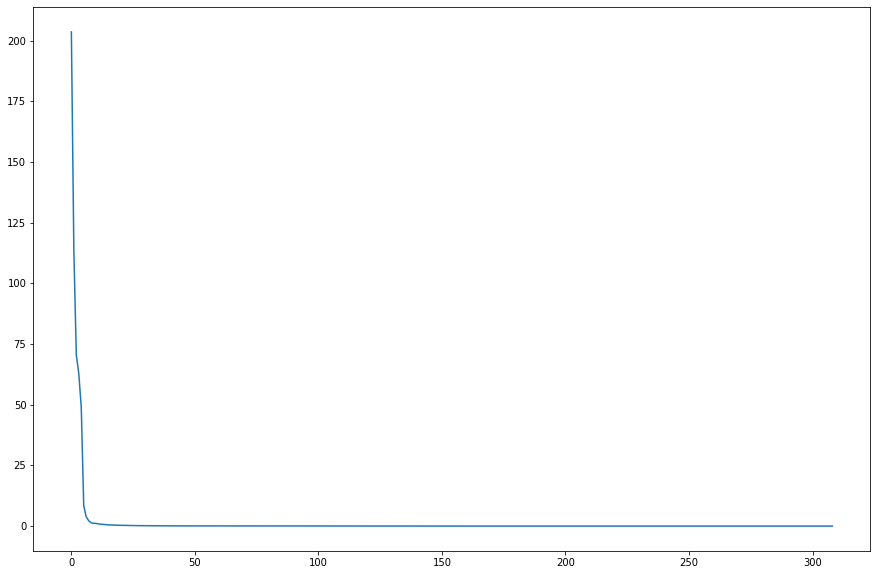

In [68]:
plt.figure(figsize=(15,10))
sns.lineplot(data=pca.explained_variance_)

In [69]:
pca=PCA(n_components=10)

In [70]:
bin_feature_train_pca=pca.fit_transform(bin_feature_train)
print(bin_feature_train_pca.shape)

(4201, 10)


In [71]:
pca=PCA(n_components=10)
bin_feature_test_pca=pca.fit_transform(bin_feature_test)
print(bin_feature_test_pca.shape)

(4209, 10)


In [72]:
bin_feature_train_PCA= pd.DataFrame(bin_feature_train_pca)
bin_feature_train_PCA=bin_feature_train_PCA.add_prefix('PC_')

In [73]:
bin_feature_test_PCA= pd.DataFrame(bin_feature_test_pca)
bin_feature_test_PCA=bin_feature_test_PCA.add_prefix('PC_')

In [74]:
bin_feature_train_PCA.insert(0,"ID",train_ID.values)

In [75]:
bin_feature_test_PCA.insert(0,"ID",test_ID.values)

In [76]:
bin_feature_train_PCA.head()

,ID,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,0,0.853791,-0.329193,2.323931,0.971632,1.447492,0.310183,-0.311059,1.038225,-0.281412,-0.069345
1,6,-0.084527,-1.341668,0.206242,-0.670172,0.214534,0.259983,-1.182380,0.413474,-0.122987,0.596606
2,7,-0.655979,-1.064575,2.269532,1.691094,-0.597411,2.874914,1.577987,-0.825033,-0.918536,-0.585615
3,9,-0.172204,-1.391449,1.441379,1.999867,-1.288394,3.175009,0.813875,-0.338751,-1.142735,-0.235293
4,13,-0.233766,-1.324519,1.393460,2.200732,-1.599106,3.359765,1.013697,-0.304768,-1.395358,-0.725605


In [77]:
bin_feature_test_PCA.head()

,ID,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,1,-0.100828,0.517879,1.842785,1.890203,-1.307760,3.342868,1.672405,0.049504,0.442435,-1.778835
1,2,3.360376,-1.409835,0.453402,-0.702097,1.405620,-1.154290,1.534334,0.922279,0.433823,-0.705093
2,3,-1.163404,-0.362777,0.441324,0.678509,0.068176,2.338991,1.287670,-0.473383,1.148196,-1.039567
3,4,-0.099456,0.556148,1.788178,1.838642,-1.368416,3.367472,1.637506,0.090729,0.437303,-1.799262
4,5,-2.928659,-0.541138,-0.208887,-1.532764,0.621194,-0.081514,-0.111350,-0.079718,-0.642655,-0.257956


In [78]:
df_train_new=pd.merge(cat_feature_train,bin_feature_train_PCA, how='left', on = 'ID')

In [79]:
df_test_new=pd.merge(cat_feature_test,bin_feature_test_PCA, how='left', on = 'ID')

In [80]:
df_train_new.drop('ID',axis=1,inplace=True)
df_train_new.head()

,y,X0,X1,X2,X3,X5,X6,X8,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,130.81,32,23,17,0,24,9,14,0.853791,-0.329193,2.323931,0.971632,1.447492,0.310183,-0.311059,1.038225,-0.281412,-0.069345
1,88.53,32,21,19,4,28,11,14,-0.084527,-1.341668,0.206242,-0.670172,0.214534,0.259983,-1.182380,0.413474,-0.122987,0.596606
2,76.26,20,24,34,2,27,9,23,-0.655979,-1.064575,2.269532,1.691094,-0.597411,2.874914,1.577987,-0.825033,-0.918536,-0.585615
3,80.62,20,21,34,5,27,11,4,-0.172204,-1.391449,1.441379,1.999867,-1.288394,3.175009,0.813875,-0.338751,-1.142735,-0.235293
4,78.02,20,23,34,5,12,3,13,-0.233766,-1.324519,1.393460,2.200732,-1.599106,3.359765,1.013697,-0.304768,-1.395358,-0.725605


In [81]:
df_test_new.drop('ID',axis=1,inplace=True)
df_test_new.head()

,X0,X1,X2,X3,X5,X6,X8,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,21,23,34,5,26,0,22,-0.100828,0.517879,1.842785,1.890203,-1.307760,3.342868,1.672405,0.049504,0.442435,-1.778835
1,42,3,8,0,9,6,24,3.360376,-1.409835,0.453402,-0.702097,1.405620,-1.154290,1.534334,0.922279,0.433823,-0.705093
2,21,23,17,5,0,9,9,-1.163404,-0.362777,0.441324,0.678509,0.068176,2.338991,1.287670,-0.473383,1.148196,-1.039567
3,21,13,34,5,31,11,13,-0.099456,0.556148,1.788178,1.838642,-1.368416,3.367472,1.637506,0.090729,0.437303,-1.799262
4,45,20,17,2,30,8,12,-2.928659,-0.541138,-0.208887,-1.532764,0.621194,-0.081514,-0.111350,-0.079718,-0.642655,-0.257956


In [82]:
X_pca_sc=df_train_new.drop('y',axis=1)
y_pca_sc_train=df_train_new['y']

#### 5.3.1  Scaling

Complete dataset will be scaled to avoid different weightage to column and this will be set by mean=0 and standard deviation=1
Here we will scale for Original dataset & Dataset with dimensional reduction(PCA).

By using scikit learn preprocessing, standardscaler function is used to fit or do the calculation for the dataset and values will be copied by transform method.

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_pca_sc=sc.fit_transform(X_pca_sc)
X_pca_sc_test=sc.transform(df_test_new)

In [84]:
X_pca_sc_train=pd.DataFrame(X_pca_sc)
X_pca_sc_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.162252,1.393990,-0.028503,-1.678183,1.291782,0.751423,0.338848,0.516605,-0.240782,1.793680,0.816426,1.377797,0.319357,-0.359467,1.261112,-0.379619,-0.095547
1,0.162252,1.159571,0.155011,0.621433,1.776683,1.437146,0.338848,-0.051145,-0.981340,0.159184,-0.563120,0.204205,0.267672,-1.366384,0.502238,-0.165907,0.822035
2,-0.712180,1.511200,1.531366,-0.528375,1.655458,0.751423,1.617953,-0.396915,-0.778665,1.751693,1.420962,-0.568647,2.959942,1.823556,-1.002151,-1.239085,-0.806891
3,-0.712180,1.159571,1.531366,1.196337,1.655458,1.437146,-1.082379,-0.104196,-1.017751,1.112499,1.680412,-1.226359,3.268913,0.940531,-0.411474,-1.541525,-0.324199
4,-0.712180,1.393990,1.531366,1.196337,-0.162923,-1.305747,0.196725,-0.141445,-0.968796,1.075515,1.849192,-1.522111,3.459134,1.171450,-0.370196,-1.882307,-0.999777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-1.586612,1.042361,-0.120260,-0.528375,-1.617627,-1.305747,0.623094,-1.341080,0.457260,0.743743,-0.974865,1.273316,0.379506,-0.024775,0.272783,0.588473,1.127082
4197,0.089382,0.573522,2.081908,0.046529,-1.617627,0.065699,-0.656011,0.608809,0.053386,0.428903,1.640730,1.711497,0.400437,-2.230187,1.446942,-2.018048,-1.106904
4198,-1.586612,1.393990,1.898394,-1.678183,-1.617627,-0.277162,-1.082379,-0.414953,0.119807,1.391444,-0.370759,-0.687429,0.931466,-1.719182,1.793385,1.800312,0.890153
4199,-1.513742,0.925151,0.705553,1.196337,-1.617627,1.437146,1.191585,0.335427,-1.258429,-1.603956,1.455863,-0.131698,-0.488992,0.558751,1.170639,-0.848581,0.426959


In [85]:
df_test_pca_sc=pd.DataFrame(X_pca_sc_test)
df_test_pca_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.639311,1.393990,1.531366,1.196337,1.534233,-2.334332,1.475830,-0.061008,0.378794,1.422317,1.588266,-1.244793,3.441737,1.932668,0.060131,0.596836,-2.450972
1,0.890945,-0.950206,-0.854317,-1.678183,-0.526599,-0.277162,1.760076,2.033271,-1.031199,0.349949,-0.589946,1.337941,-1.188429,1.773109,1.120274,0.585217,-0.971514
2,-0.639311,1.393990,-0.028503,1.196337,-1.617627,0.751423,-0.371765,-0.703944,-0.265346,0.340627,0.570125,0.064894,2.408169,1.488060,-0.575009,1.548892,-1.432370
3,-0.639311,0.221892,1.531366,1.196337,2.140360,1.437146,0.196725,-0.060178,0.406785,1.380170,1.544941,-1.302529,3.467069,1.892337,0.110207,0.589912,-2.479117
4,1.109553,1.042361,-0.028503,-0.528375,2.019134,0.408561,0.054603,-1.772051,-0.395806,-0.161225,-1.287923,0.591284,-0.083925,-0.128679,-0.096832,-0.866928,-0.355425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-1.732350,-0.246947,-0.028503,1.196337,-1.496402,0.751423,-1.082379,-1.745387,0.372526,-0.462743,0.387753,-0.306079,-0.997749,1.609313,-0.523408,-1.646713,-0.192055
4205,0.890945,-1.184625,-0.854317,0.046529,-1.496402,0.751423,1.760076,1.218118,-0.004358,0.451467,-0.911896,1.524405,0.714281,-0.137509,-0.885796,1.054808,0.043942
4206,1.255291,1.393990,-0.028503,1.196337,-1.496402,-1.305747,1.475830,-0.760898,1.216534,-1.569426,0.836474,-0.502711,-0.688787,1.228670,-0.845630,0.783196,-0.489378
4207,-1.659481,1.393990,-0.028503,-1.678183,-1.496402,-1.648608,0.623094,-1.408463,-1.238904,0.054740,-1.010770,-0.039449,0.181700,0.239367,0.401493,-0.792248,-0.363964


In [86]:
df_test.drop('ID',axis=1,inplace=True)

In [87]:
df_test.head()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,21,23,34,5,26,0,22,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,42,3,8,0,9,6,24,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,21,23,17,5,0,9,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,21,13,34,5,31,11,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,45,20,17,2,30,8,12,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
df_train_new.shape , df_test_new.shape

((4201, 18), (4209, 17))

In [89]:
col=['ID','y']
X_sc=df_train.drop(col,axis=1)
y_sc=df_train['y']

In [90]:
sc_df=StandardScaler()
X_sc=sc_df.fit_transform(X_sc)
df_test_sc= sc_df.transform(df_test)


In [91]:
col_train=df_train.columns[2:]
X_sc_df=pd.DataFrame(X_sc,columns=col_train)
X_sc_df

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0.162252,1.393990,-0.028503,-1.678183,1.291782,0.751423,0.338848,-0.116234,-0.283732,4.035848,...,-0.140215,-0.542042,-0.684374,-0.246695,1.474910,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
1,0.162252,1.159571,0.155011,0.621433,1.776683,1.437146,0.338848,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,1.461189,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
2,-0.712180,1.511200,1.531366,-0.528375,1.655458,0.751423,1.617953,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
3,-0.712180,1.159571,1.531366,1.196337,1.655458,1.437146,-1.082379,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4,-0.712180,1.393990,1.531366,1.196337,-0.162923,-1.305747,0.196725,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-1.586612,1.042361,-0.120260,-0.528375,-1.617627,-1.305747,0.623094,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,1.461189,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4197,0.089382,0.573522,2.081908,0.046529,-1.617627,0.065699,-0.656011,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,4.053583,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4198,-1.586612,1.393990,1.898394,-1.678183,-1.617627,-0.277162,-1.082379,-0.116234,3.524447,4.035848,...,-0.140215,-0.542042,-0.684374,-0.246695,1.474910,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4199,-1.513742,0.925151,0.705553,1.196337,-1.617627,1.437146,1.191585,-0.116234,-0.283732,-0.247779,...,-0.140215,1.844875,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824


In [92]:
col_test=df_test.columns
df_test_sc=pd.DataFrame(df_test_sc,columns=col_test)
df_test_sc

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,-0.639311,1.393990,1.531366,1.196337,1.534233,-2.334332,1.475830,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,6.876580,-0.096801,-0.090329,-0.040854,-0.021824
1,0.890945,-0.950206,-0.854317,-1.678183,-0.526599,-0.277162,1.760076,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,1.474910,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
2,-0.639311,1.393990,-0.028503,1.196337,-1.617627,0.751423,-0.371765,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,6.876580,-0.096801,-0.090329,-0.040854,-0.021824
3,-0.639311,0.221892,1.531366,1.196337,2.140360,1.437146,0.196725,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,-0.246695,-0.678008,6.876580,-0.096801,-0.090329,-0.040854,-0.021824
4,1.109553,1.042361,-0.028503,-0.528375,2.019134,0.408561,0.054603,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,1.461189,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-1.732350,-0.246947,-0.028503,1.196337,-1.496402,0.751423,-1.082379,-0.116234,-0.283732,-0.247779,...,-0.140215,1.844875,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4205,0.890945,-1.184625,-0.854317,0.046529,-1.496402,0.751423,1.760076,-0.116234,-0.283732,-0.247779,...,-0.140215,-0.542042,-0.684374,4.053583,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4206,1.255291,1.393990,-0.028503,1.196337,-1.496402,-1.305747,1.475830,-0.116234,-0.283732,-0.247779,...,-0.140215,1.844875,-0.684374,-0.246695,-0.678008,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824
4207,-1.659481,1.393990,-0.028503,-1.678183,-1.496402,-1.648608,0.623094,-0.116234,-0.283732,4.035848,...,-0.140215,-0.542042,-0.684374,-0.246695,1.474910,-0.145421,-0.096801,-0.090329,-0.040854,-0.021824


### 6. Model Selection & Evaluation

Train test split is to split complete dataset into train & test datasets. By training model on training set we can predict the label on testing data.
Two types of datsets are considered in this project
1. Original dataset with EDA and scaled (X=X_sc_df, y=y_sc , df_test_sc)
2. Dataset with EDA, PCA and scaled (X=X_pca_sc_train, y=y_pca_sc_train, df_test_pca_sc)

Following three machine learning models are considered:
1. Decision Tree Regressor
2. Random Forest Regressor
3. XGBoost

Model evaluation for regression type is done by using r2_score.

In order to avoid repeated execution of model, each model is defined in user defined function.

In [93]:
X_train,x_test,y_train,y_test = train_test_split(X_sc_df,y_sc,test_size=0.3,random_state=42)

In [94]:
X_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca_sc_train,y_pca_sc_train,test_size=0.3,random_state=42)

#### 6.1 Decision Tree model

In [95]:
def dtr_model(X_m,y_m,x_n):
    dtr=DecisionTreeRegressor() # create a decision tree regressor model object
    #create parameter dictionary
    depth=[1,5,10,50,100,500] 
    parameters={'max_depth': depth}
    #RandomizedsearchCV to tune hyperparameter
    model=RandomizedSearchCV(dtr, param_distributions=parameters, verbose=10, n_jobs=-1)
    global dtr_result, y_train_pred, y_pred
    dtr_result = model.fit (X_m,y_m)  # Fit the model
    y_train_pred = dtr_result.predict(X_m)
    y_pred = dtr_result.predict(x_n)
    best_max_depth = dtr_result.best_estimator_.get_params()['max_depth'] # get the best parameter
    print('Best max_depth :', best_max_depth)
    print('r2_Score:', r2_score(y_true=y_m,y_pred=y_train_pred))

In [96]:
dtr_model(X_train,y_train,x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best max_depth : 5
r2_Score: 0.6310997337826114


In [97]:
print("Train r2 score:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test r2 score:",r2_score(y_true=y_test,y_pred=y_pred))

Train r2 score: 0.6310997337826114
Test r2 score: 0.5714091113408997


In [98]:
dtr_model(X_train_pca,y_train_pca,x_test_pca)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best max_depth : 5
r2_Score: 0.5451287394291053


In [99]:
print("PCA Train r2 score:",r2_score(y_true=y_train_pca,y_pred=y_train_pred))
print("PCA Test r2 score:",r2_score(y_true=y_test_pca,y_pred=y_pred))

PCA Train r2 score: 0.5451287394291053
PCA Test r2 score: 0.5010553250418466


In [100]:
dtr_model(X_train,y_train,df_test_sc)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best max_depth : 5
r2_Score: 0.6310997337826114


In [101]:
y_pred_dtr=pd.DataFrame(y_pred.reshape(-1,1))[0]
y_pred_dtr

0        78.750000
1        93.829943
2        78.003014
3        76.073030
4       112.267201
           ...    
4204    102.319391
4205     98.076735
4206     93.829943
4207    112.267201
4208     93.829943
Name: 0, Length: 4209, dtype: float64

In [102]:
df_test_dtr=pd.DataFrame(df_test, copy=True)
df_test_dtr.insert(0,"y_pred",y_pred_dtr)
df_test_dtr

,y_pred,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,78.750000,21,23,34,5,26,0,22,0,0,...,0,0,0,0,0,1,0,0,0,0
1,93.829943,42,3,8,0,9,6,24,0,0,...,0,0,0,0,1,0,0,0,0,0
2,78.003014,21,23,17,5,0,9,9,0,0,...,0,0,0,0,0,1,0,0,0,0
3,76.073030,21,13,34,5,31,11,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,112.267201,45,20,17,2,30,8,12,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,102.319391,6,9,17,5,1,9,4,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,98.076735,42,1,8,3,1,9,24,0,0,...,0,0,0,1,0,0,0,0,0,0
4206,93.829943,47,23,17,5,1,3,22,0,0,...,0,1,0,0,0,0,0,0,0,0
4207,112.267201,7,23,17,0,1,2,16,0,0,...,0,0,0,0,1,0,0,0,0,0


In [103]:
df_test_dtr.head()
df_test_dtr.to_csv('df_test_dtr_model_pred.csv')

#### 6.2 Random Forest model

In [104]:
def rf_model(X_m,y_m,x_n):
    rf = RandomForestRegressor() # create a random forest regressor model object
    #create parameter dictionary
    n_estimators = [300, 350, 400, 450, 500, 600,650,700] # No. of trees in rf
    max_features = ['auto', 'sqrt']   #features to consider at every split
    max_depth = [1,2,3, 5, 10, 15, 20] # Maximum no. of levels in tree
    min_samples_split = [15, 100, 150, 200,250,300] # Minimum no.of samples for node split
    min_samples_leaf = [1, 2,4, 5, 7, 10] # Minimum no.of samples for each leaf node
    
    parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
    #RandomizedsearchCV to tune hyperparameter
    model=RandomizedSearchCV(rf, param_distributions=parameters, verbose=10, n_jobs=-1)
    global rf_result,rf_train_pred,rf_test_pred
    rf_result = model.fit (X_m,y_m)  # Fit the model
    rf_train_pred = rf_result.predict(X_m)
    rf_test_pred = rf_result.predict(x_n)
    best_max_depth = rf_result.best_estimator_.get_params()['max_depth']
    best_n_estimators = rf_result.best_estimator_.get_params()['n_estimators']
    best_max_features = rf_result.best_estimator_.get_params()['max_features']
    best_min_samples_split = rf_result.best_estimator_.get_params()['min_samples_split']
    best_min_samples_leaf = rf_result.best_estimator_.get_params()['min_samples_leaf']
    #Print The best parameters
    print('Best max_depth:', best_max_depth)
    print('Best n_estimators:', best_n_estimators)
    print('Best max_features:', best_max_features)
    print('Best min_samples_split:', best_min_samples_split)
    print('Best min_samples_leaf:', best_min_samples_leaf)
    print('r2_Score:', r2_score(y_true=y_m,y_pred=rf_train_pred))

In [105]:
rf_model(X_train,y_train,x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 10
Best n_estimators: 600
Best max_features: auto
Best min_samples_split: 250
Best min_samples_leaf: 10
r2_Score: 0.6338886621927542


In [106]:
print("Train r2 score using Random Forest:",r2_score(y_true=y_train,y_pred=rf_train_pred))
print("Test r2 score using Random Forest:",r2_score(y_true=y_test,y_pred=rf_test_pred))

Train r2 score using Random Forest: 0.6338886621927542
Test r2 score using Random Forest: 0.604371077750524


In [107]:
rf_model(X_train_pca,y_train_pca,x_test_pca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 10
Best n_estimators: 500
Best max_features: auto
Best min_samples_split: 100
Best min_samples_leaf: 1
r2_Score: 0.6315280442155988


In [108]:
print("PCA Train r2 score using Random Forest:",r2_score(y_true=y_train_pca,y_pred=rf_train_pred))
print("PCA Test r2 score using Random Forest model:",r2_score(y_true=y_test_pca,y_pred=rf_test_pred))

PCA Train r2 score using Random Forest: 0.6315280442155988
PCA Test r2 score using Random Forest model: 0.5589119195672487


In [122]:
rf_model(X_train,y_train,df_test_sc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 3
Best n_estimators: 400
Best max_features: auto
Best min_samples_split: 200
Best min_samples_leaf: 10
r2_Score: 0.6157447914361889


In [123]:
y_pred_rf=pd.DataFrame(rf_test_pred.reshape(-1,1))[0]
y_pred_rf

0        77.970119
1        94.032864
2        77.970119
3        77.970119
4       111.735055
           ...    
4204    103.230396
4205     94.032864
4206     94.032864
4207    112.327363
4208     94.032864
Name: 0, Length: 4209, dtype: float64

In [124]:
df_test_rf= pd.DataFrame(df_test, copy= True)
df_test_rf.insert(0,"y_pred",y_pred_rf)

In [125]:
df_test_rf.head()
df_test_rf.to_csv('df_test_rf_model_pred.csv')

#### 6.3 XGBoost model

In [126]:
def xgb_model(X_m,y_m,x_n):
    xgb = XGBRegressor(random_state=42, n_jobs=-1) # create a random forest regressor model object
    #create parameter dictionary
    parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
              'n_estimators':[100,150,200,500], #Number of gradient boosted trees
              'max_depth':[2,3,5,10], #Maximum tree depth for base learners.
              'colsample_bytree':[0.1,0.5,0.7,1], #Subsample ratio of columns when constructing each tree.
              'subsample':[0.2,0.3,0.5,1], #Subsample ratio of the training instance.
              'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],# Minimum loss reduction for further leaf node partition.         
              'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]} # L1 regularization term on weights

    model=RandomizedSearchCV(xgb,parameters,cv=5, scoring='r2', return_train_score=True, n_jobs=-1,
                       verbose=10)
    global xgb_result, xgb_train_pred, xgb_test_pred
    xgb_result = model.fit(X_m,y_m)
    xgb_train_pred = xgb_result.predict(X_m)
    xgb_test_pred = xgb_result.predict(x_n)
    best_max_depth = xgb_result.best_estimator_.get_params()['max_depth']
    best_n_estimators = xgb_result.best_estimator_.get_params()['n_estimators']
    best_colsample_bytree = xgb_result.best_estimator_.get_params()['colsample_bytree']
    best_subsample = xgb_result.best_estimator_.get_params()['subsample']
    best_gamma = xgb_result.best_estimator_.get_params()['gamma']
    best_reg_alpha = xgb_result.best_estimator_.get_params()['reg_alpha']
    best_learning_rate = xgb_result.best_estimator_.get_params()['learning_rate']
    #Print The best parameters
    print('Best max_depth:', best_max_depth)
    print('Best n_estimators:', best_n_estimators)
    print('Best colsample_bytree:', best_colsample_bytree)
    print('Best subsample:', best_subsample)
    print('Best reg_alpha:', best_reg_alpha)
    print('Best gamma:', best_gamma)
    print('Best learning_rate:', best_learning_rate)
    print('Predicted Score:', xgb_result.score(x_n,xgb_test_pred))

In [127]:
xgb_model(X_train,y_train,x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 2
Best n_estimators: 150
Best colsample_bytree: 0.5
Best subsample: 0.2
Best reg_alpha: 0.1
Best gamma: 1
Best learning_rate: 0.05
Predicted Score: 1.0


In [128]:
print("Train r2 score using XGBoost:",r2_score(y_true=y_train,y_pred=xgb_train_pred))
print("Test r2 score using XGBoost:",r2_score(y_true=y_test,y_pred=xgb_test_pred))

Train r2 score using XGBoost: 0.6292738504954585
Test r2 score using XGBoost: 0.6067442903060238


In [129]:
xgb_model(X_train_pca,y_train_pca,x_test_pca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 5
Best n_estimators: 500
Best colsample_bytree: 1
Best subsample: 1
Best reg_alpha: 0.001
Best gamma: 0.01
Best learning_rate: 0.01
Predicted Score: 1.0


In [130]:
print("PCA Train r2 score using XGBoost:",r2_score(y_true=y_train_pca,y_pred=xgb_train_pred))
print("PCA Test r2 score using XGBoost:",r2_score(y_true=y_test_pca,y_pred=xgb_test_pred))

PCA Train r2 score using XGBoost: 0.705412523338508
PCA Test r2 score using XGBoost: 0.5772591440971335


In [131]:
xgb_model(X_train,y_train,df_test_sc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best max_depth: 3
Best n_estimators: 500
Best colsample_bytree: 0.5
Best subsample: 0.5
Best reg_alpha: 10.0
Best gamma: 1
Best learning_rate: 0.05
Predicted Score: 1.0


In [132]:
y_pred_xgb=pd.DataFrame(xgb_test_pred.reshape(-1,1))[0]
y_pred_xgb

0        76.476357
1        94.956467
2        76.976738
3        75.211334
4       109.828934
           ...    
4204    102.499252
4205     95.416267
4206     93.130814
4207    110.298462
4208     92.792679
Name: 0, Length: 4209, dtype: float32

In [133]:
df_test_xgb= pd.DataFrame(df_test, copy= True)
df_test_xgb.insert(0,"y_pred",y_pred_xgb)

In [134]:
df_test_xgb.head()
df_test_xgb.to_csv('df_test_XGB_model_pred.csv')

                                ***************************END*********************************************